# Machine Learning - Mini Project 1

Harry Setiawan Hamjaya
2302000


## Importing librairies

In [1]:
!pip install grplot
!pip install --upgrade grplot

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from collections import Counter

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve


# Set the maximum number of displayed columns to None to show all columns
pd.set_option('display.max_columns', None)
# Set the maximum column width to a large value
pd.set_option('display.max_colwidth', None)

## Reading CSV file




In [2]:
dataset_csv = 'https://raw.githubusercontent.com/hhamjaya/banking_campaign_prediction/main/bank-additional-full.csv'

df = pd.read_csv(dataset_csv, sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
shape = df.shape
print(f"There are {shape[0]} observations with {shape[1]-1} features and 1 label")

There are 41188 observations with 20 features and 1 label


Verifying data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Verifying null values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Describing the data

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Getting feature names

In [7]:
feature_names = df.columns
feature_names[0:-1]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [8]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print("Number of numerical features: ",len(numerical_features))
print("Number of categorical features: ",len(categorical_features))

Number of numerical features:  10
Number of categorical features:  10


In [9]:
label = df.columns[-1]
label

'y'

## Exploratory Data Analysis

In [10]:
df_eda = df.copy(deep=True)

Check Label Distribution

In [11]:
df_eda[label] = LabelEncoder().fit_transform(df_eda[label])

In [12]:
df_eda

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


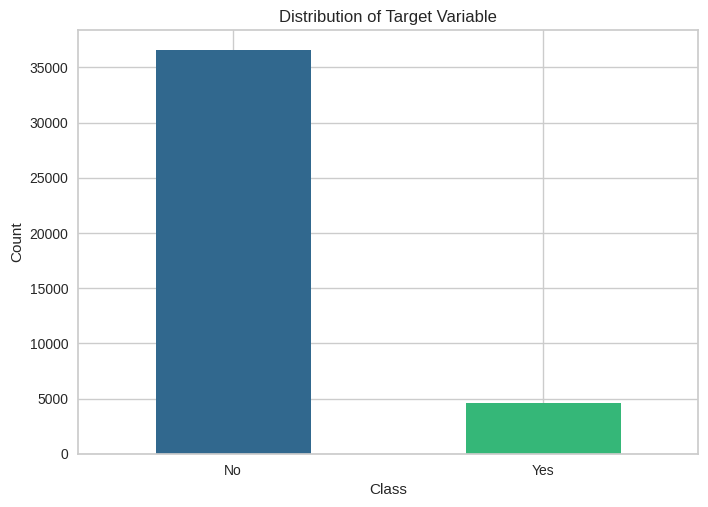

In [13]:
fig, ax = plt.subplots()
df_eda[label].value_counts().plot(kind='bar', color=['#31688E', '#35B778'])
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Save the figure
plt.savefig('label_distribution.png')
plt.show()

In [14]:
df_eda[label].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Check "Unknown" Data

In [15]:
# Assuming 'data' is your DataFrame
unknown_counts = df_eda.apply(lambda x: x.value_counts().get('unknown', 0))

print("Number of 'unknown' values in each feature:")
print(unknown_counts)

Number of 'unknown' values in each feature:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Visualization for Categorical Features

In [16]:
def categorical_plot(data, feature, target):
  # Assuming 'data' is your DataFrame, 'categorical_feature' is the feature of interest, and 'target_variable' is your target variable
  plt.figure(figsize=(10, 6))

  # Create a bar plot with color-coded bars based on the target variable
  sns.countplot(x=feature, hue=target, data=data, palette='viridis')

  plt.title('Distribution of '+feature+' with Respect to Target Variable')
  plt.xlabel(feature)
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Count')
  plt.savefig(feature+'.png')
  plt.show()

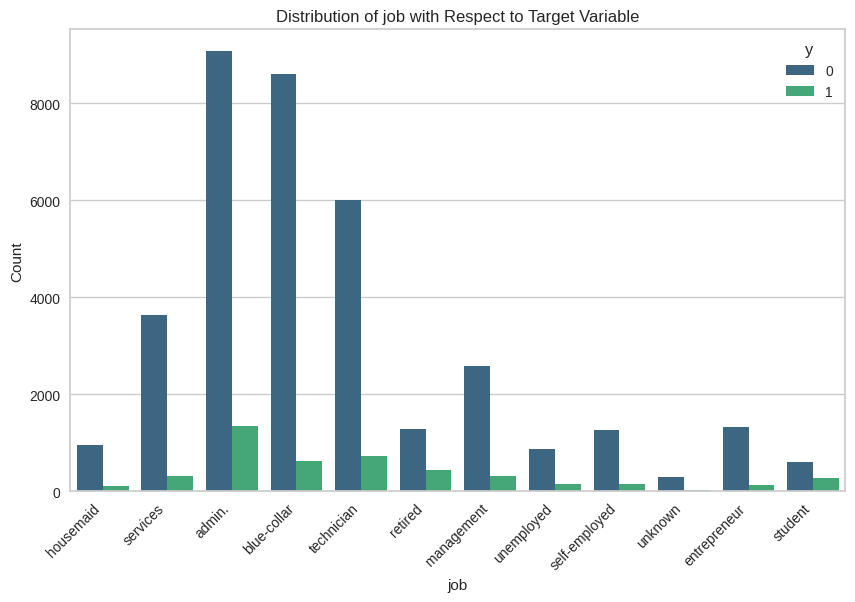

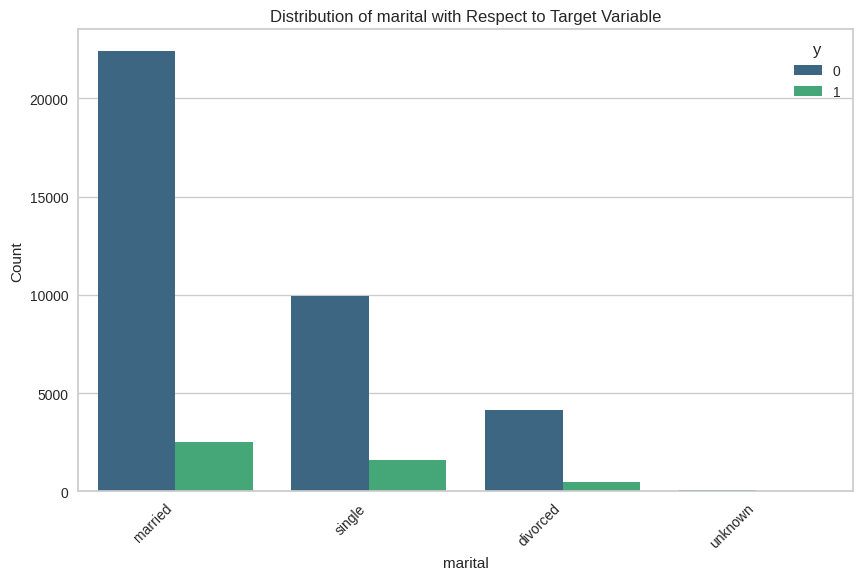

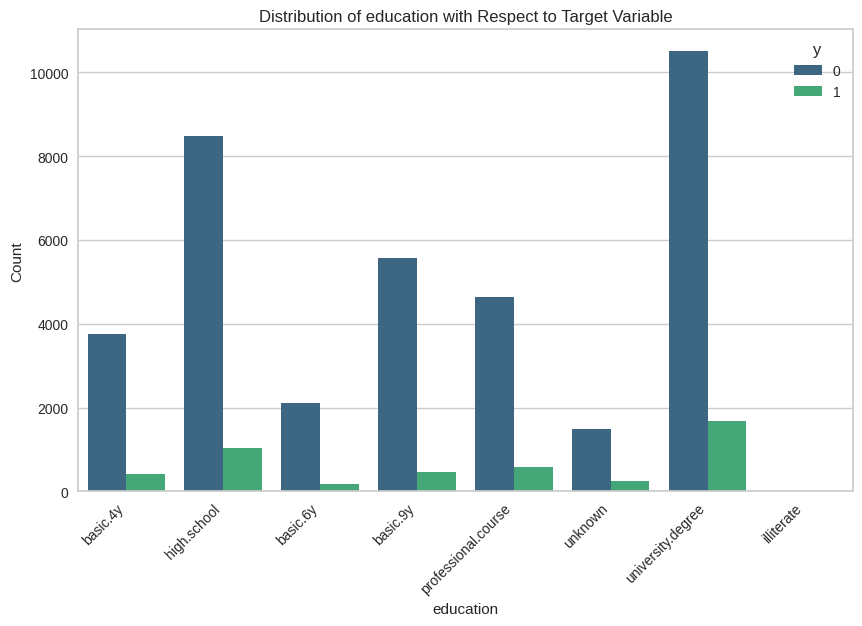

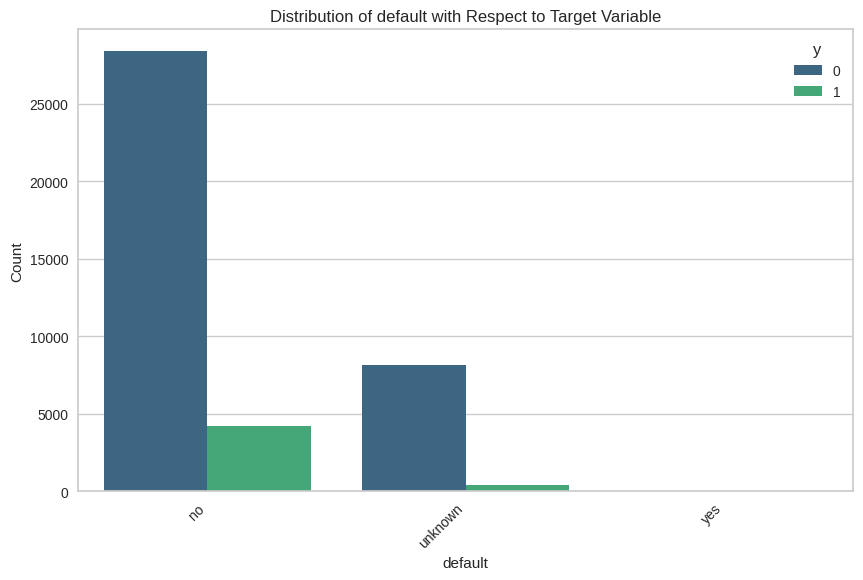

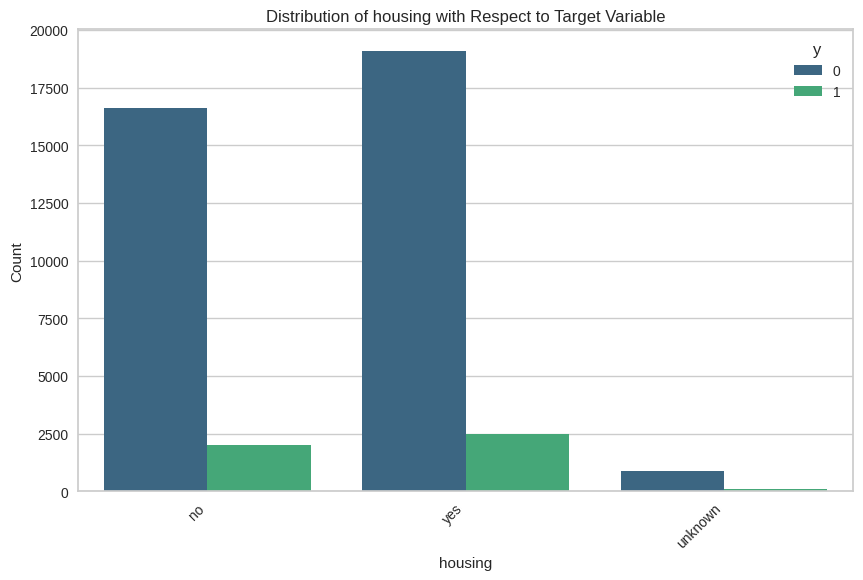

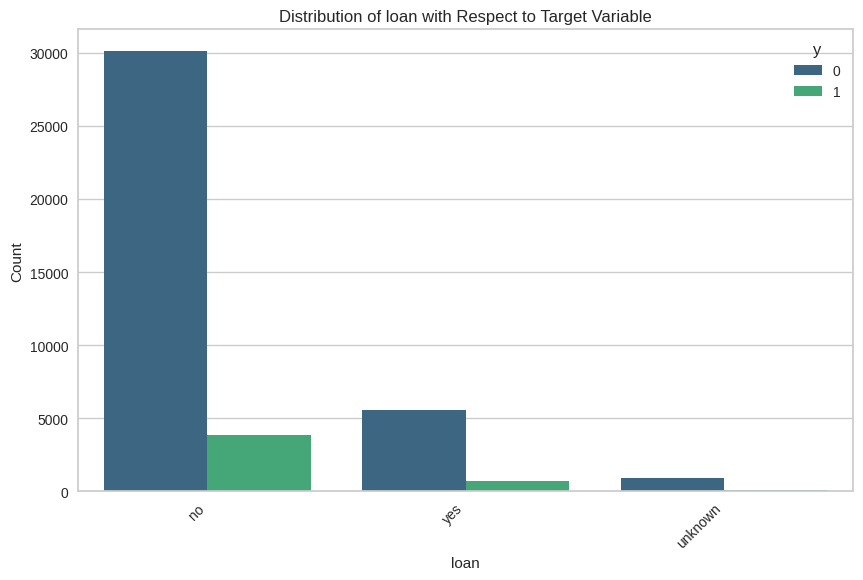

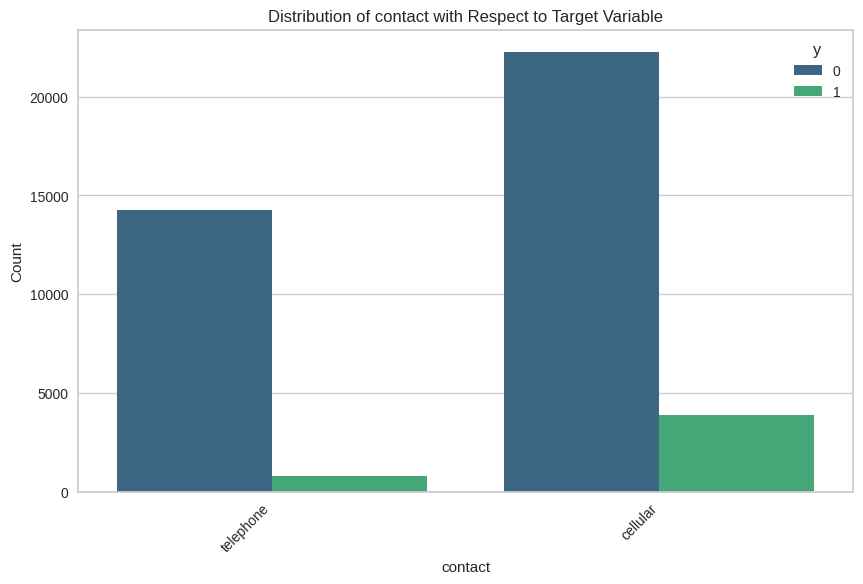

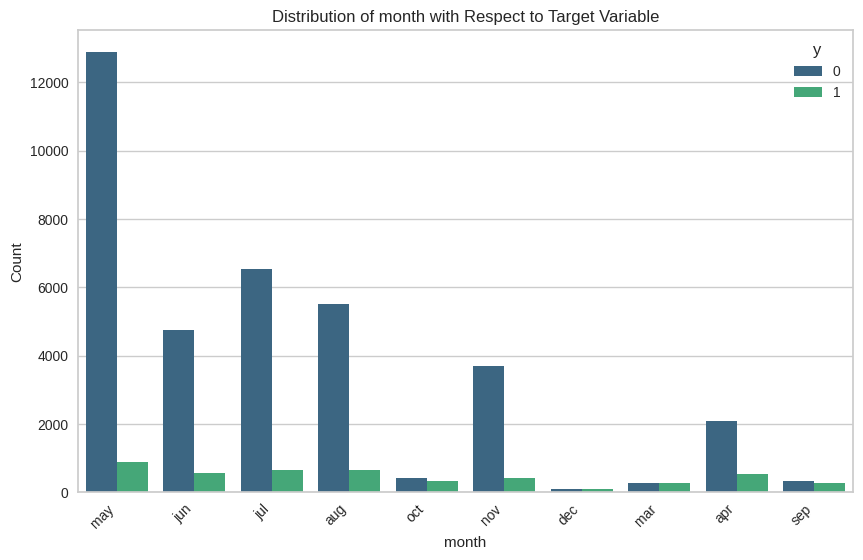

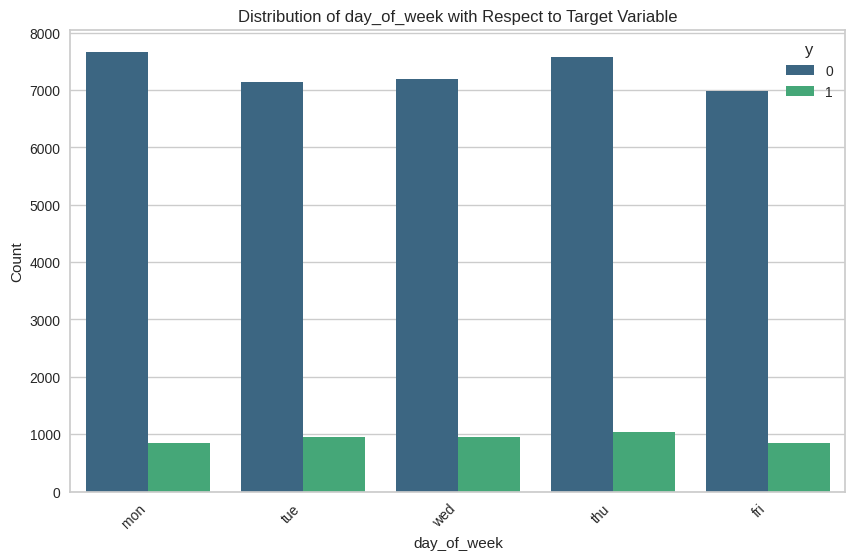

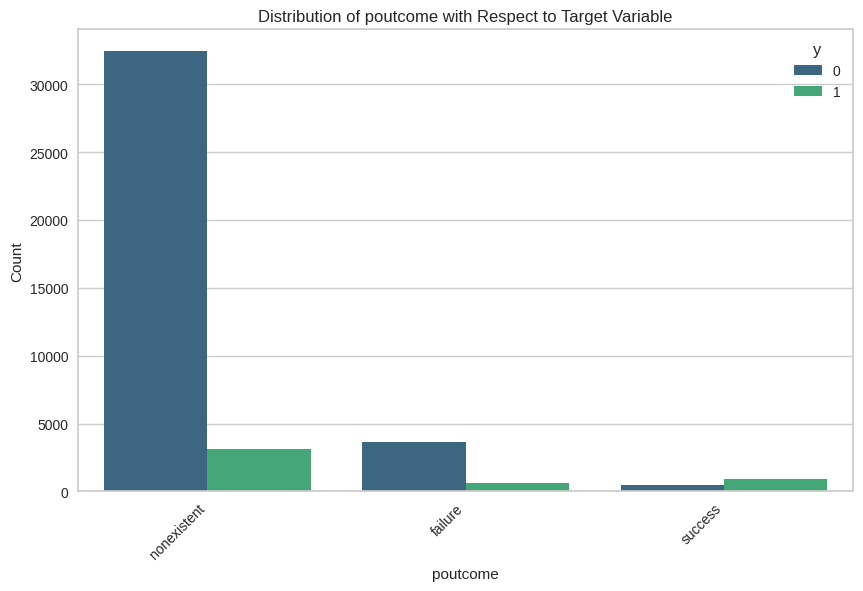

In [17]:
for feature in categorical_features:
  categorical_plot(df_eda, feature, label)

In [18]:
def calculate_woe_iv(data, target, feature):
    event_total = data[target].sum()
    non_event_total = data.shape[0] - event_total

    # Calculate WoE and IV for each category
    woe_dict = {}
    iv = 0

    for category in data[feature].unique():
        event_count = data[data[feature] == category][target].sum()
        non_event_count = data[data[feature] == category].shape[0] - event_count

        percentage_event = event_count / event_total
        percentage_non_event = non_event_count / non_event_total

        if percentage_event == 0:
            percentage_event = 0.0001  # Avoid division by zero

        if percentage_non_event == 0:
            percentage_non_event = 0.0001  # Avoid division by zero

        woe = np.log(percentage_non_event / percentage_event)
        woe_dict[category] = woe

        iv += (percentage_non_event - percentage_event) * woe

    return woe_dict, iv

In [19]:
df_preprocess = df_eda.copy(deep=True)

In [20]:
for feature in categorical_features:
  # Apply WoE encoding to the 'contact' feature
  woe_values, iv_contact = calculate_woe_iv(df_preprocess, label, feature)
  print(feature, woe_values, iv_contact)

  # Map WoE values back to the original dataset
  df_preprocess[feature] = df_preprocess[feature].map(woe_values)

job {'housemaid': 0.13331247843800917, 'services': 0.3598215331177416, 'admin.': -0.16052481239193747, 'blue-collar': 0.5391258365932243, 'technician': 0.044722437998921664, 'retired': -0.9776647282010504, 'management': 0.004801370541626522, 'unemployed': -0.2652321868255814, 'self-employed': 0.080487339056398, 'unknown': 0.005342597474632559, 'entrepreneur': 0.3102431865970874, 'student': -1.2837535413486352} 0.18871287107835757
marital {'married': 0.11596076830650681, 'single': -0.2489667222013447, 'divorced': 0.0981544630586348, 'unknown': -0.3293110435101039} 0.028215132169045226
education {'basic.4y': 0.10594234887830577, 'high.school': 0.04374073276940277, 'basic.6y': 0.3512415121294411, 'basic.9y': 0.40250184750955303, 'professional.course': -0.008281205912092878, 'unknown': -0.28956767127183336, 'university.degree': -0.2255509624967659, 'illiterate': -0.8111491304028423} 0.048576408429404055
default {'no': -0.15220988971481683, 'unknown': 0.8487820144358527, 'yes': -0.197429083

In [21]:
df_preprocess

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.133312,0.115961,0.105942,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,261,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.359822,0.115961,0.043741,0.848782,0.039186,-0.007460,0.832863,0.613035,0.139068,149,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.359822,0.115961,0.043741,-0.152210,-0.034935,-0.007460,0.832863,0.613035,0.139068,226,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0,0
3,40,-0.160525,0.115961,0.351242,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,151,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.359822,0.115961,0.043741,-0.152210,0.039186,0.033845,0.832863,0.613035,0.139068,307,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-0.977665,0.115961,-0.008281,-0.152210,-0.034935,-0.007460,-0.308581,0.117428,0.046516,334,1,999,0,0.270384,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0.539126,0.115961,-0.008281,-0.152210,0.039186,-0.007460,-0.308581,0.117428,0.046516,383,1,999,0,0.270384,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,-0.977665,0.115961,-0.225551,-0.152210,-0.034935,-0.007460,-0.308581,0.117428,0.046516,189,2,999,0,0.270384,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0.044722,0.115961,-0.008281,-0.152210,0.039186,-0.007460,-0.308581,0.117428,0.046516,442,1,999,0,0.270384,-1.1,94.767,-50.8,1.028,4963.6,1


Visualizing the features distribution

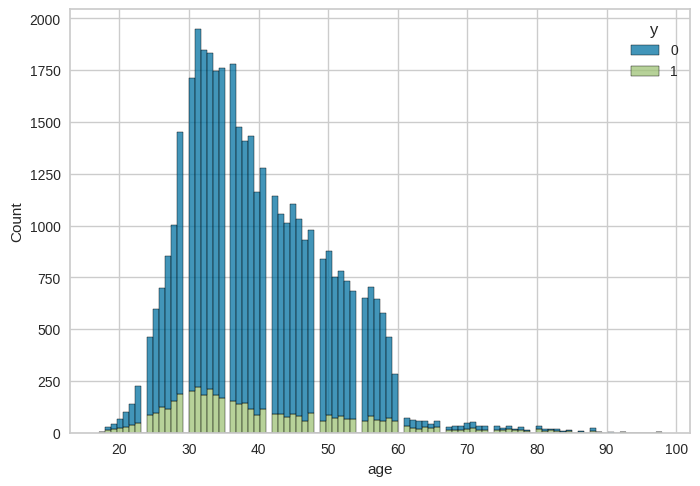

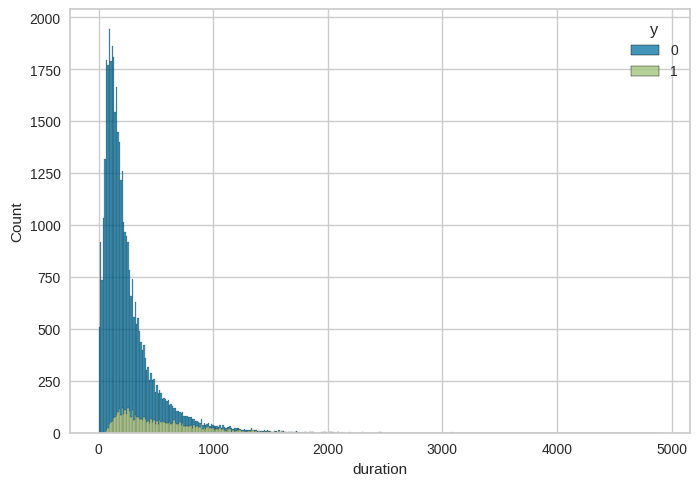

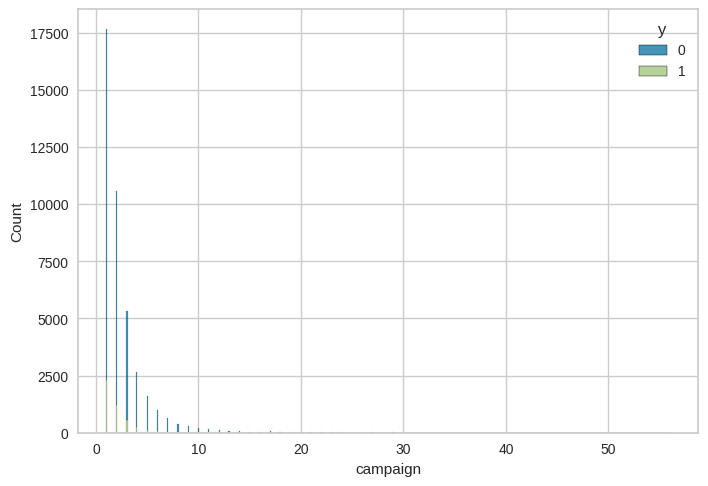

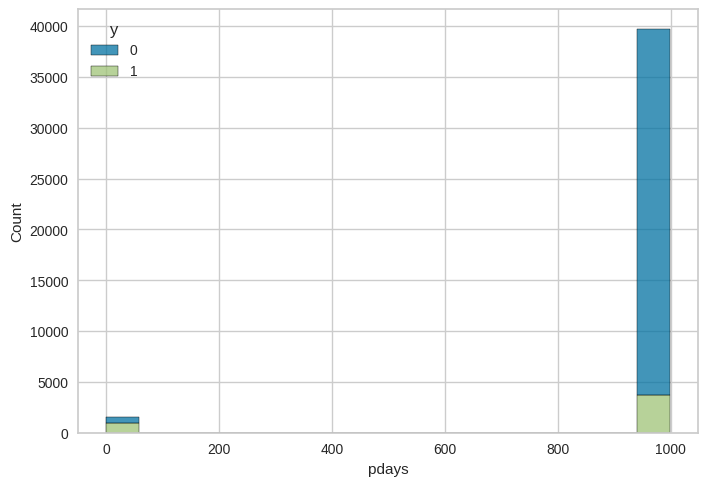

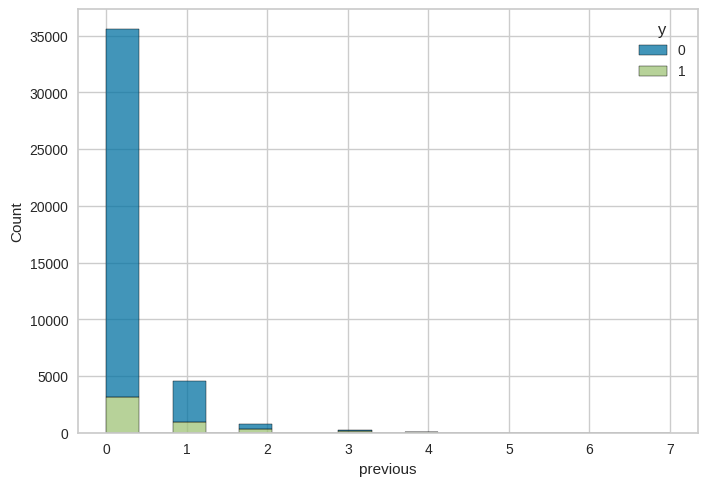

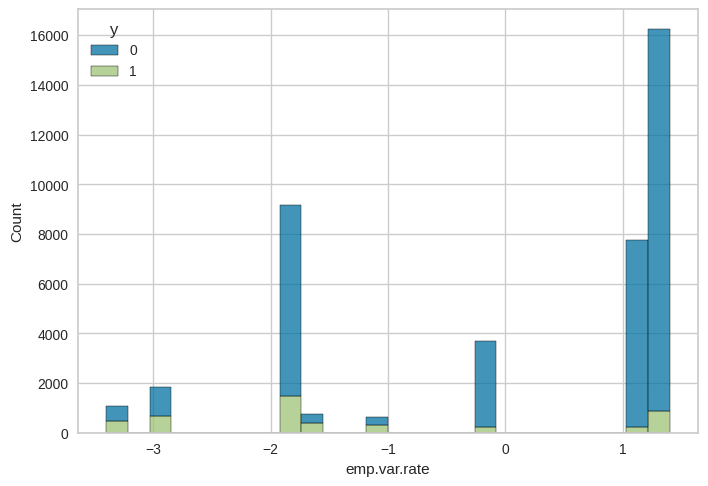

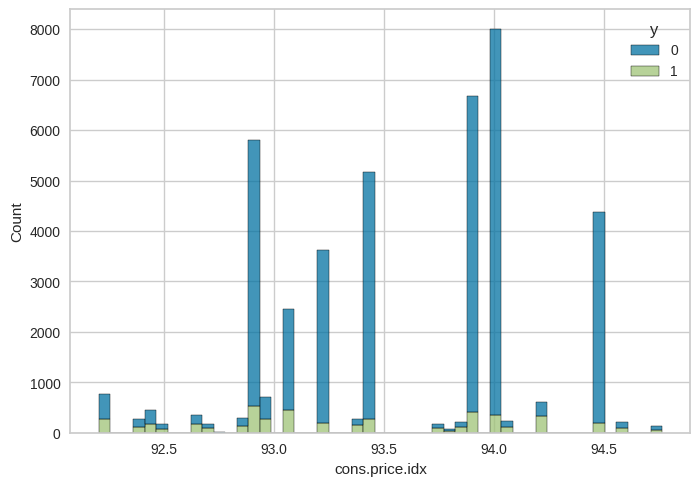

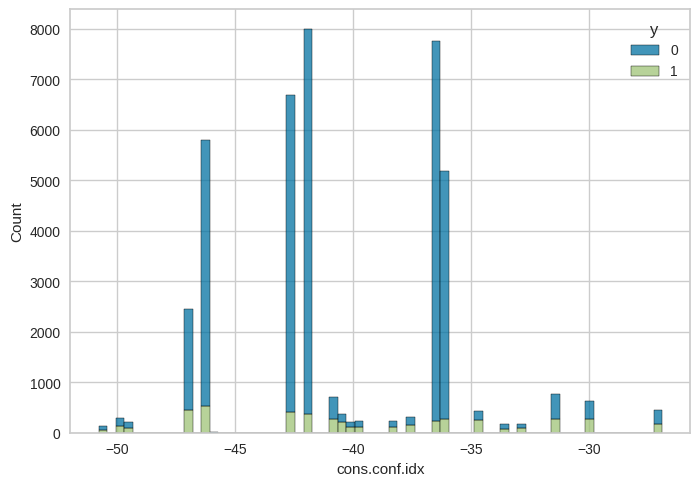

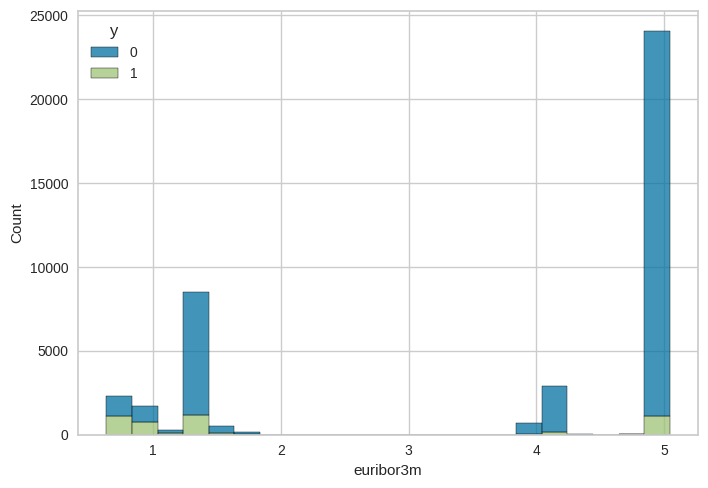

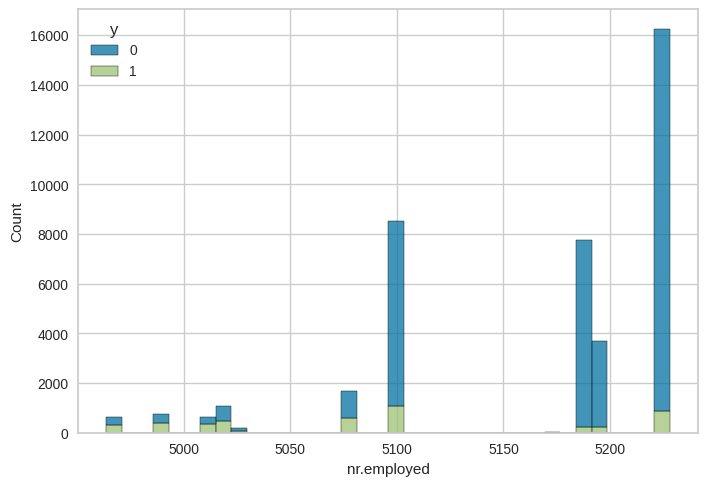

In [22]:
from grplot import plot2d
import grplot_seaborn as gs
import locale

for feature in numerical_features:
  sns.histplot(data = df_preprocess, x = feature, hue=label, multiple="stack")
  plt.savefig(feature+'.png')
  plt.show()

In [23]:
notable_feature = feature_names[1:11]
notable_feature

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration'],
      dtype='object')

Verifying correlation between variables

In [24]:
df_corr = df_preprocess.copy(deep=True)

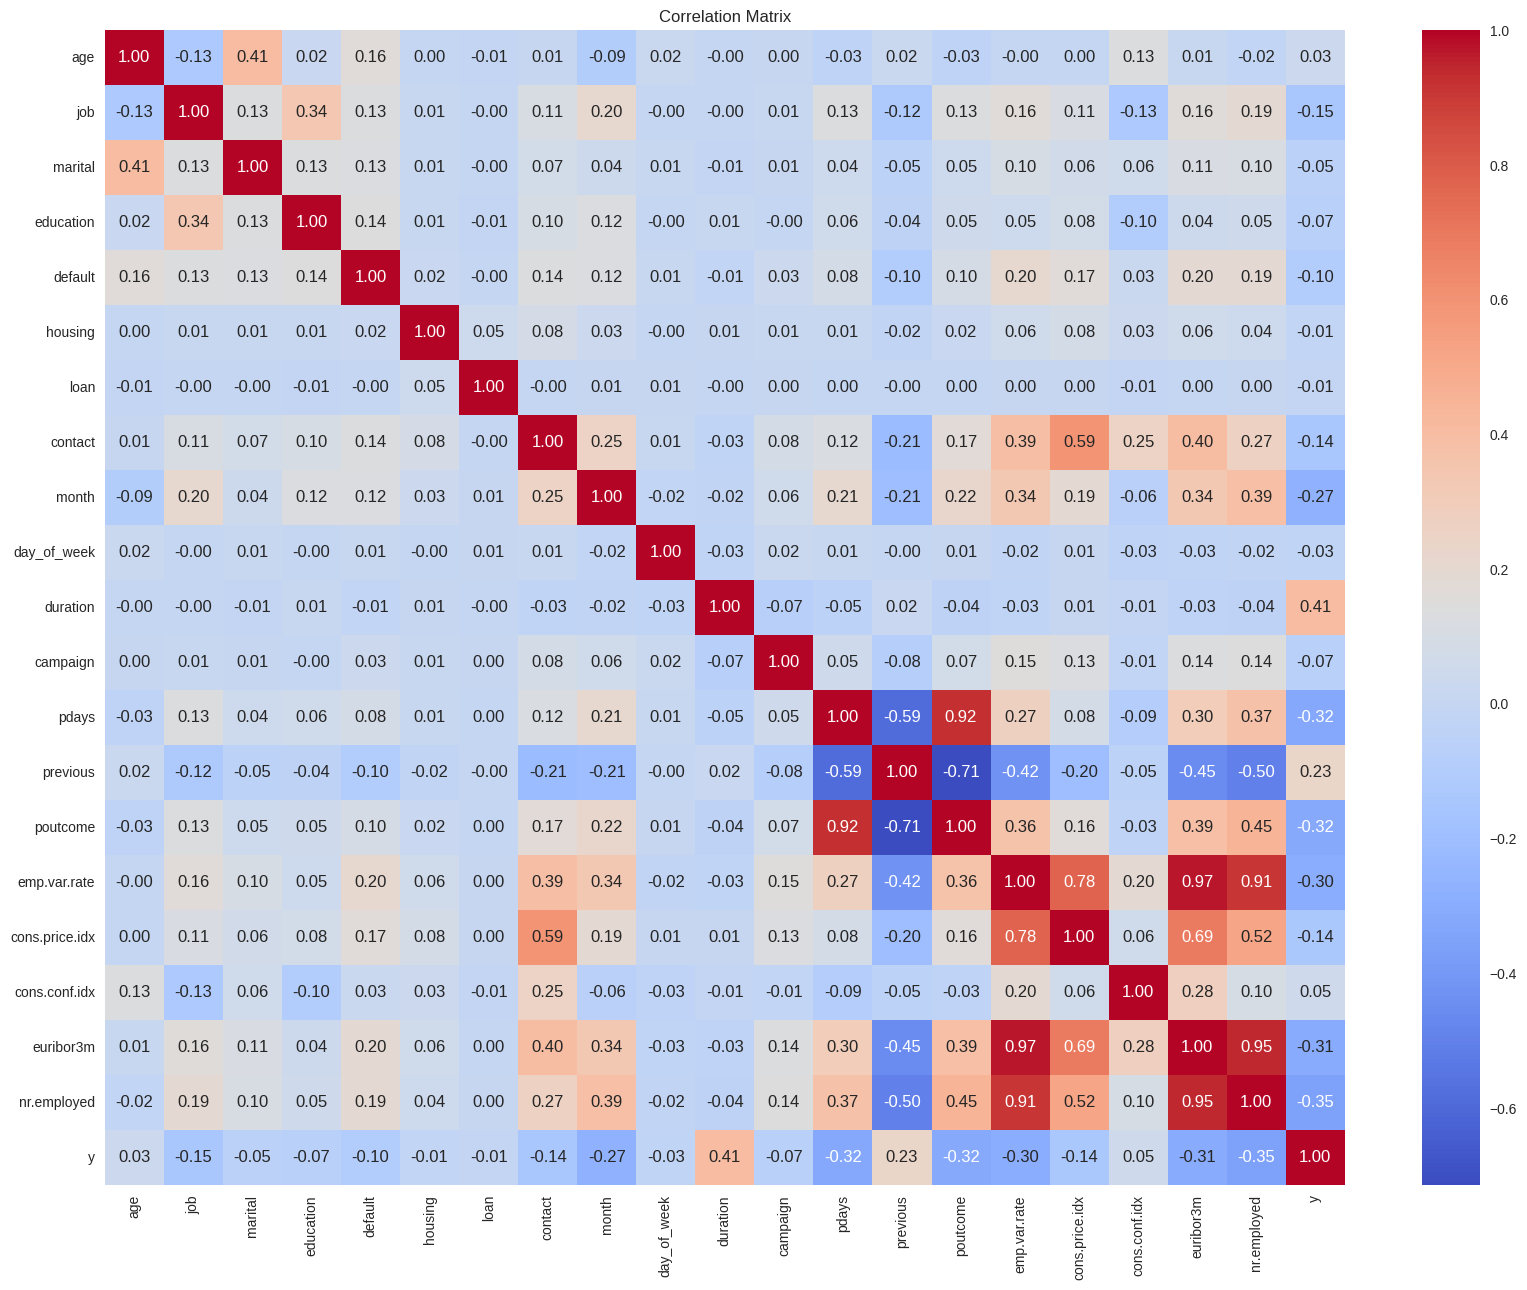

In [25]:
correlation_matrix = df_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('Correlation.png')
plt.show()

In [26]:
# Compute the correlation between labels and each feature
correlations = df_corr.corrwith(df_corr['y']).abs()

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the sorted correlations for each feature
print("Correlations between labels and features (sorted):")
print(sorted_correlations)

Correlations between labels and features (sorted):
y                 1.000000
duration          0.405274
nr.employed       0.354678
pdays             0.324914
poutcome          0.317285
euribor3m         0.307771
emp.var.rate      0.298334
month             0.266064
previous          0.230181
job               0.148658
contact           0.144773
cons.price.idx    0.136211
default           0.099290
education         0.068208
campaign          0.066357
cons.conf.idx     0.054878
marital           0.054570
age               0.030399
day_of_week       0.025189
housing           0.011748
loan              0.005154
dtype: float64


In [27]:
# Convert the sorted correlations to a DataFrame
sorted_correlations_df = pd.DataFrame(sorted_correlations, columns=['Correlation'])

# Save the sorted correlations to a CSV file
sorted_correlations_df.to_csv('sorted_correlations.csv')

print("Sorted correlations saved to 'sorted_correlations.csv'")

Sorted correlations saved to 'sorted_correlations.csv'


In [28]:
# Filter the features with correlation greater than 0.1
highly_correlated_features = correlations[correlations > 0.1]

# Sort the correlations in descending order
sorted_correlations = highly_correlated_features.sort_values(ascending=False)
highly_correlated_features = sorted_correlations.index
highly_correlated_features = highly_correlated_features[1:]
highly_correlated_features_without_duration = highly_correlated_features[1:]

In [29]:
df_feature_selection = df_corr.copy(deep=True)

In [30]:
df_notable = df_feature_selection[highly_correlated_features]
df_notable.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,job,contact,cons.price.idx
0,261,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.133312,0.832863,93.994
1,149,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994
2,226,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994
3,151,5191.0,999,0.270384,4.857,1.1,0.613035,0,-0.160525,0.832863,93.994
4,307,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994


In [31]:
df_notable_without_duration = df_feature_selection[highly_correlated_features_without_duration]
df_notable_without_duration.head()

,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,job,contact,cons.price.idx
0,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.133312,0.832863,93.994
1,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994
2,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994
3,5191.0,999,0.270384,4.857,1.1,0.613035,0,-0.160525,0.832863,93.994
4,5191.0,999,0.270384,4.857,1.1,0.613035,0,0.359822,0.832863,93.994


In [32]:
df_all = df_feature_selection.drop([label], axis=1)
df_all.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,0.133312,0.115961,0.105942,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,261,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
1,57,0.359822,0.115961,0.043741,0.848782,0.039186,-0.007460,0.832863,0.613035,0.139068,149,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
2,37,0.359822,0.115961,0.043741,-0.152210,-0.034935,-0.007460,0.832863,0.613035,0.139068,226,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
3,40,-0.160525,0.115961,0.351242,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,151,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
4,56,0.359822,0.115961,0.043741,-0.152210,0.039186,0.033845,0.832863,0.613035,0.139068,307,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0


In [33]:
df_all_without_duration = df_feature_selection.drop(["duration", label], axis=1)
df_all_without_duration.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,0.133312,0.115961,0.105942,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
1,57,0.359822,0.115961,0.043741,0.848782,0.039186,-0.007460,0.832863,0.613035,0.139068,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
2,37,0.359822,0.115961,0.043741,-0.152210,-0.034935,-0.007460,0.832863,0.613035,0.139068,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
3,40,-0.160525,0.115961,0.351242,-0.152210,0.039186,-0.007460,0.832863,0.613035,0.139068,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0
4,56,0.359822,0.115961,0.043741,-0.152210,0.039186,0.033845,0.832863,0.613035,0.139068,1,999,0,0.270384,1.1,93.994,-36.4,4.857,5191.0


In [34]:
all_feature = df_all.columns

In [35]:
all_feature_without_duration = df_all_without_duration.columns

Selecting columns with correlation > 0.1 as Notable

- We chose the features that had more correlation in order to improve the model prediction performance.
- The floating number indicates the minimum correlation between features and label.
- The Notable features indicate the most important feature based on the definitions, in this case, I believe grades are the most important features. Since it doesn't matter when someone open the lecture, but didn't achieve the grade because late submission or probably didn't intend to do it compared to other who complete all the task while didn't click on any lecture.
- Last but not least, I will still compared with using all features, to determine whether the feature selection is effective or not.

## Preprocessing selected data

### Train Test Split

In [36]:
label = df_preprocess[label].copy(deep=True)

In [37]:
random_seed = 42
# Only selected features
X_train_0, X_test_0, y_train, y_test = train_test_split(df_notable, label, test_size=0.20, random_state=random_seed)
# Only selected features - without duration
X_train_1, X_test_1, y_train, y_test = train_test_split(df_notable_without_duration, label, test_size=0.20, random_state=random_seed)
# All features
X_train, X_test, y_train, y_test = train_test_split(df_all, label, test_size=0.20, random_state=random_seed)
# All features
X_train_d, X_test_d, y_train, y_test = train_test_split(df_all_without_duration, label, test_size=0.20, random_state=random_seed)

Standardizing the data

In [38]:
def standardize_data(features):
    scaler = StandardScaler().fit(features)
    return scaler

def transform_data(scaler, X_train, X_test):
    X_train_transform = scaler.transform(X_train)
    X_test_transform = scaler.transform(X_test)
    return X_train_transform, X_test_transform

In [39]:
# Selected features
scaler_selected_0 = standardize_data(X_train_0)
X_train_transform_0, X_test_transform_0 = transform_data(scaler_selected_0, X_train_0, X_test_0)

# Selected features - without duration
scaler_selected_1 = standardize_data(X_train_1)
X_train_transform_1, X_test_transform_1 = transform_data(scaler_selected_1, X_train_1, X_test_1)

# All features
scaler_selected = standardize_data(X_train)
X_train_transform, X_test_transform = transform_data(scaler_selected, X_train, X_test)

# All features
scaler_selected_d = standardize_data(X_train_d)
X_train_transform_d, X_test_transform_d = transform_data(scaler_selected_d, X_train_d, X_test_d)

Evaluating Results

In [40]:
def Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test, average='macro'):
  # Training Model
  model.fit(X_train, y_train)
  # Model making a prediction on test data
  y_pred = model.predict(X_test)

  n_kfold = 10
  random_seed = 42

  kf = StratifiedKFold(n_splits=n_kfold, shuffle=True, random_state=random_seed)

  cv_score_accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "accuracy")
  cv_score_fmacro = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "f1_macro")
  cv_score_fweighted = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "f1_weighted")

  cv_acc = cv_score_accuracy.mean()
  cv_fmacro = cv_score_fmacro.mean()
  cv_fweighted = cv_score_fweighted.mean()

  metrics = {}

  # Accuracy
  metrics['Accuracy'] = accuracy_score(y_test, y_pred)

  # Precision
  metrics['Precision'] = precision_score(y_test, y_pred, average=average)

  # Recall
  metrics['Recall'] = recall_score(y_test, y_pred, average=average)

  # F1-Score Macro
  metrics['F1'] = f1_score(y_test, y_pred, average="macro")

  # Confusion Matrix
  metrics['Confusion Matrix'] = confusion_matrix(y_test, y_pred).tolist()

  # Cross Validation Score
  metrics['CV Accuracy'] = cv_acc.mean()
  metrics['CV F1'] = cv_fmacro.mean()
  metrics['CV F1 Weighted'] = cv_fweighted.mean()

  return model, cv_score_accuracy, cv_score_fmacro, cv_score_fweighted, metrics

In [41]:
def plot_confussion_matrix(data, model, feature_selection):
  # Define class labels (assuming they are class 0, 1)
  class_labels = [0, 1]

  # Create a confusion matrix plot
  sns.set(font_scale=1.2)  # Set font size
  plt.figure(figsize=(8, 6))
  sns.heatmap(data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix "+str(model)+" "+ str(feature_selection))
  plt.show()

# Training Models

In [42]:
# Initiate Empty Data Frame
All_Result = pd.DataFrame()
cv_accuracy = pd.DataFrame()
cv_fmacro = pd.DataFrame()
cv_fweighted = pd.DataFrame()

## Logistic Regression

In [43]:
model = "Logistic Regression"

In [44]:
random_state = 8

### Without Scaling

With all features

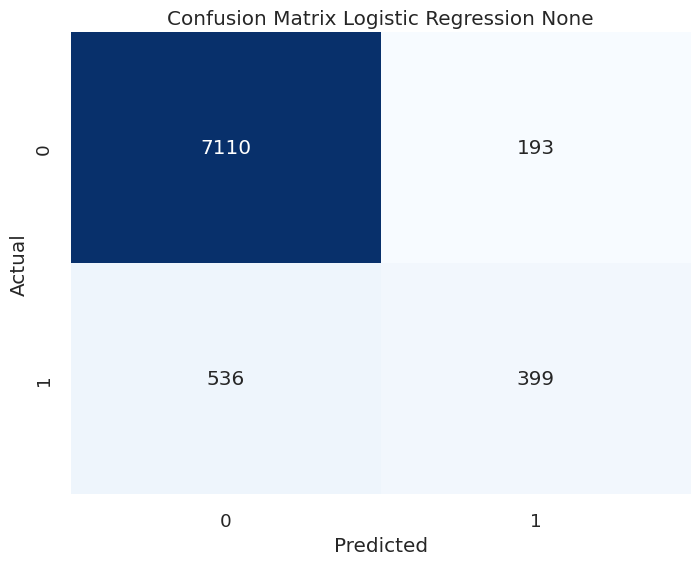

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955


In [45]:
Logistic_model = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model,X_train,y_train,X_test,y_test)
Logistic_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

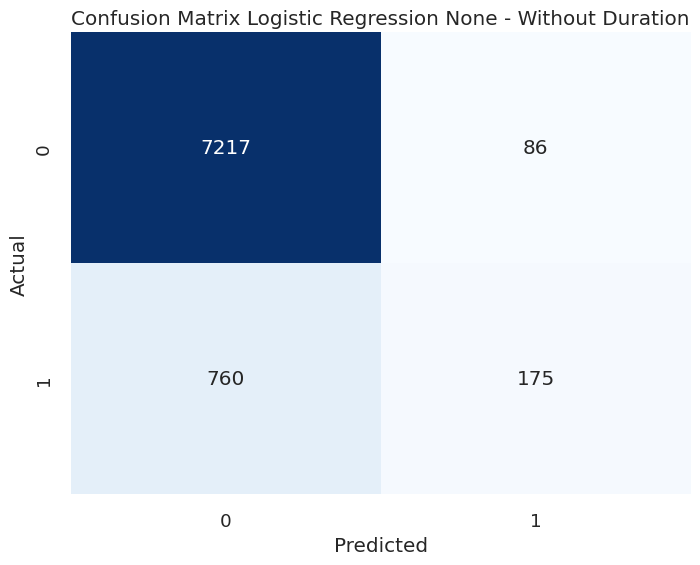

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315


In [46]:
Logistic_model_d = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_d,X_train_d,y_train,X_test_d,y_test)
Logistic_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None - Without Duration"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

With selected features

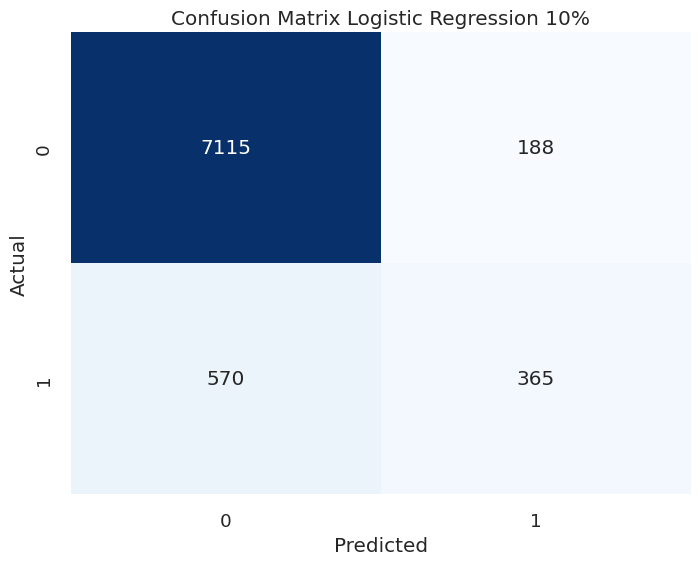

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249


In [47]:
Logistic_model_0 = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_0,X_train_0,y_train,X_test_0,y_test)
Logistic_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

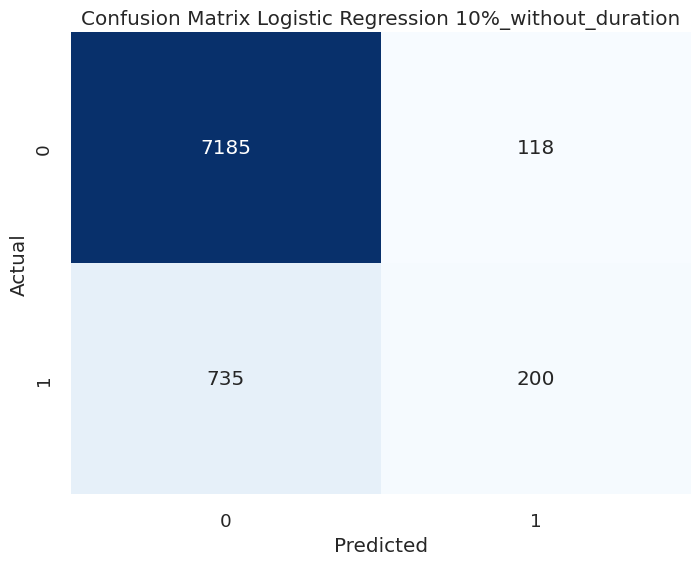

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461


In [48]:
Logistic_model_1 = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_1,X_train_1,y_train,X_test_1,y_test)
Logistic_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%_without_duration"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

### with scaling

With all features

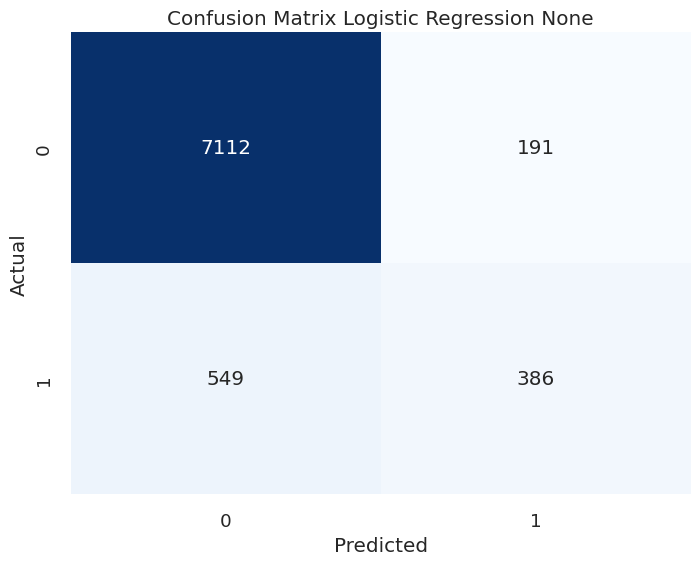

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872


In [49]:
Logistic_model_scale = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_scale,X_train_transform,y_train,X_test_transform,y_test)
Logistic_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

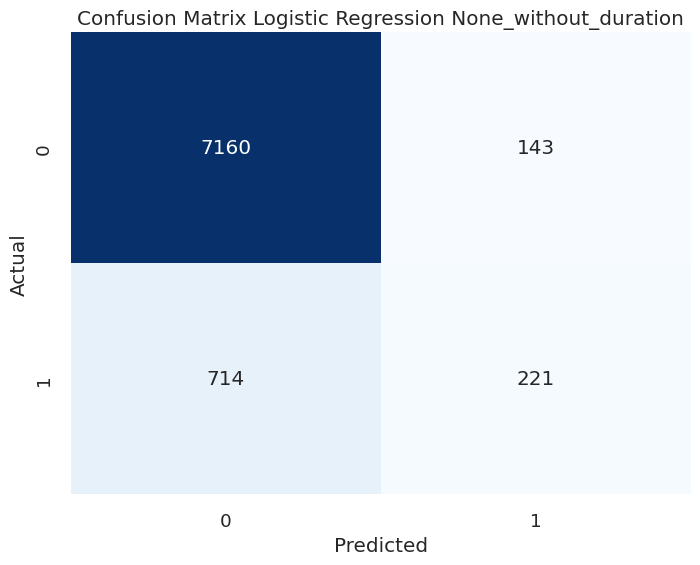

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612


In [50]:
Logistic_model_scale_d = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_scale_d,X_train_transform_d,y_train,X_test_transform_d,y_test)
Logistic_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None_without_duration"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

With selected features

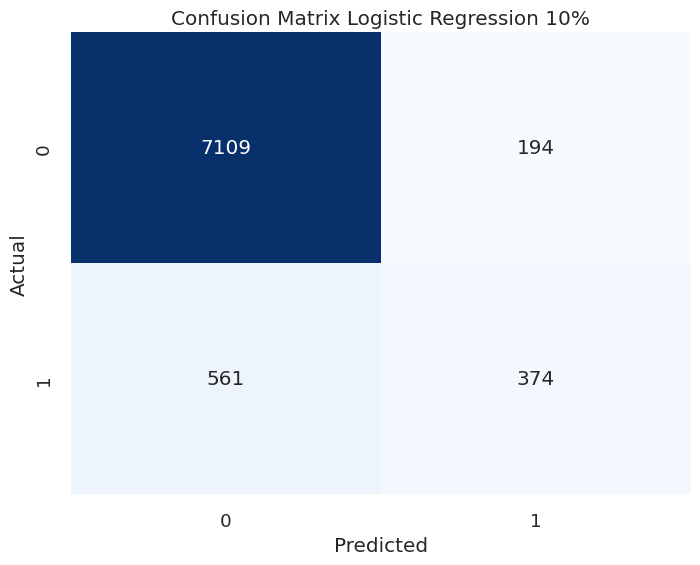

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222


In [51]:
Logistic_model_0_scale = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_0_scale,X_train_transform_0,y_train,X_test_transform_0,y_test)
Logistic_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

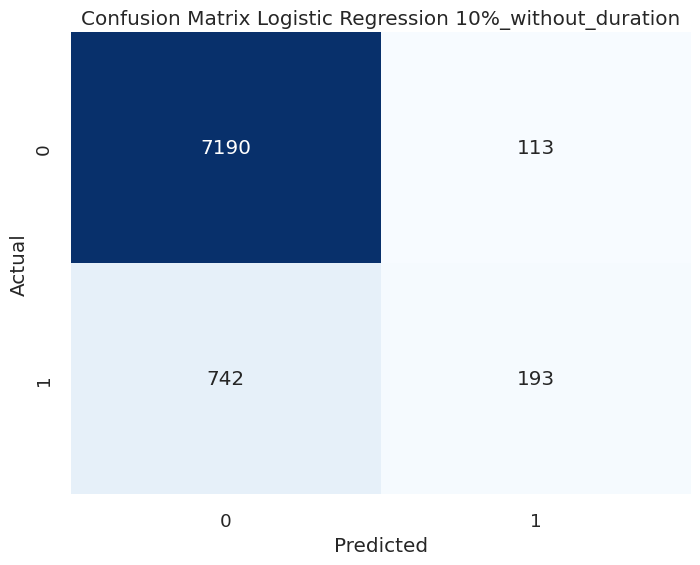

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720


In [52]:
Logistic_model_1_scale = LogisticRegression(random_state = random_state)
temp = Models_Evaluation_Metrics(Logistic_model_1_scale,X_train_transform_1,y_train,X_test_transform_1,y_test)
Logistic_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%_without_duration"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

## Random Forest

In [53]:
model = "Random Forest"

In [54]:
random_state = 8

In [55]:
n_estimators = 10

with all features

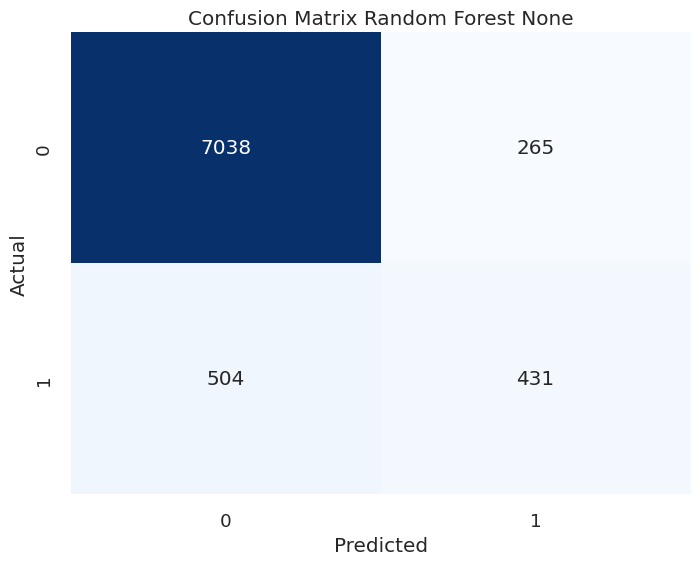

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513


In [56]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model,X_train,y_train,X_test,y_test)
rf_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

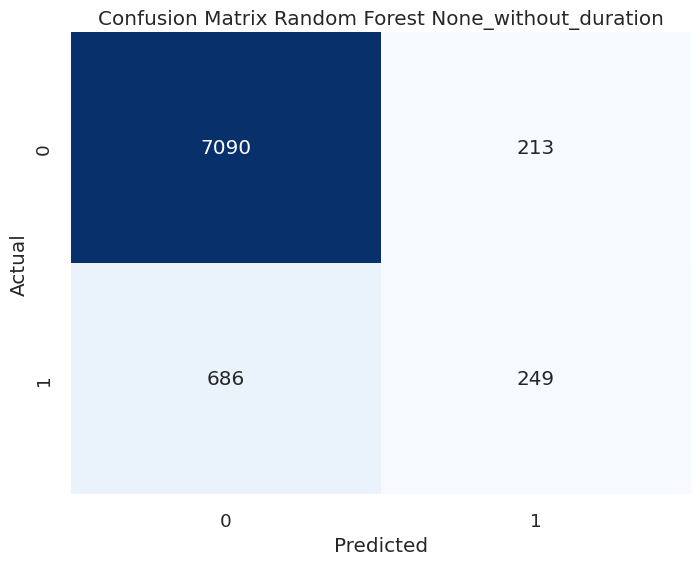

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [57]:
rf_model_d = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_d,X_train_d,y_train,X_test_d,y_test)
rf_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None_without_duration"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

With selected features

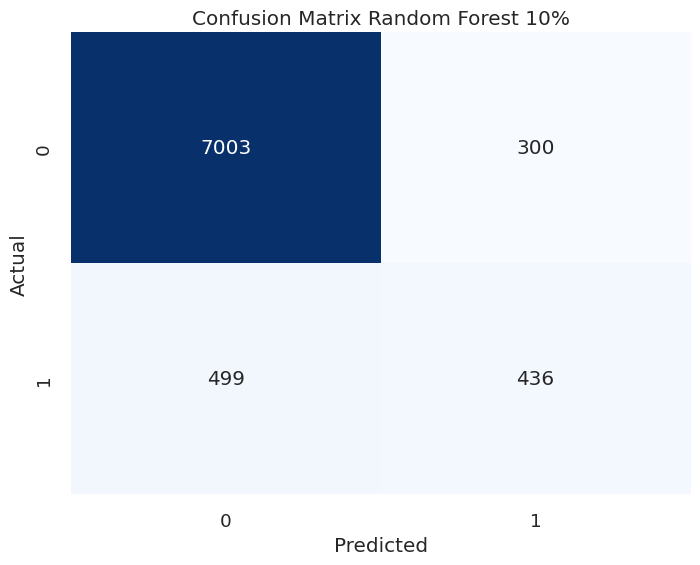

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [58]:
rf_model_0 = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_0,X_train_0,y_train,X_test_0,y_test)
rf_model_notable = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "10%"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

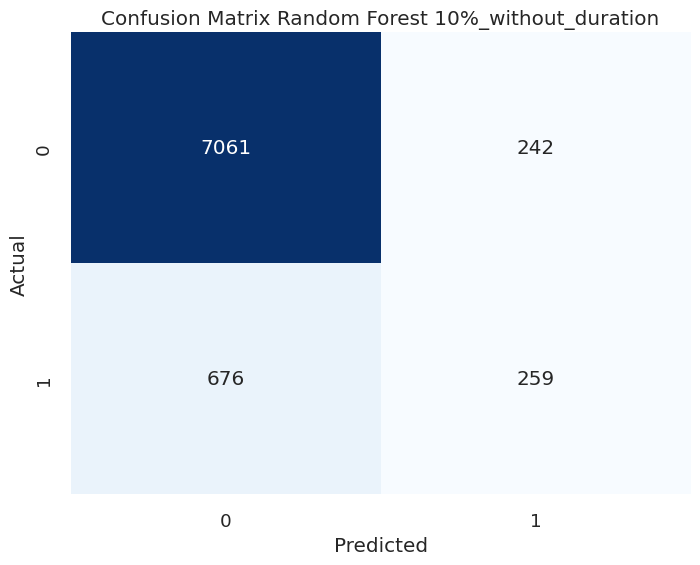

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [59]:
rf_model_1 = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_1,X_train_1,y_train,X_test_1,y_test)
rf_model_notable = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "10%_without_duration"
scaler = "None"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

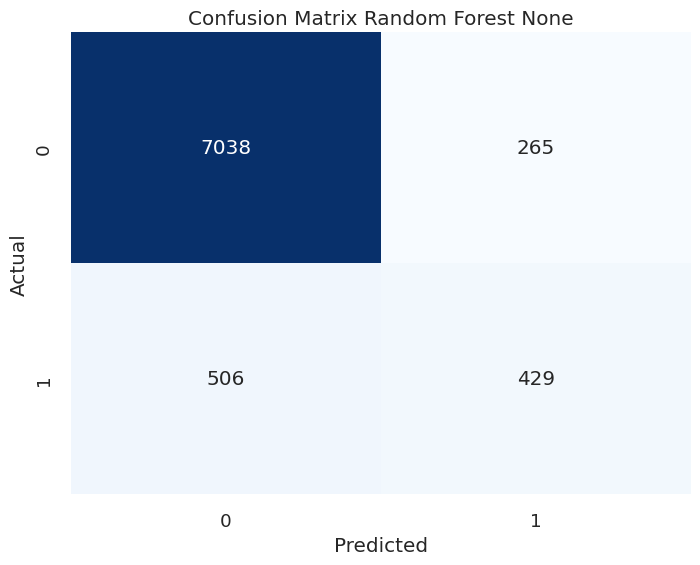

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [60]:
rf_model_scale = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_scale,X_train_transform,y_train,X_test_transform,y_test)
rf_model_notable = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

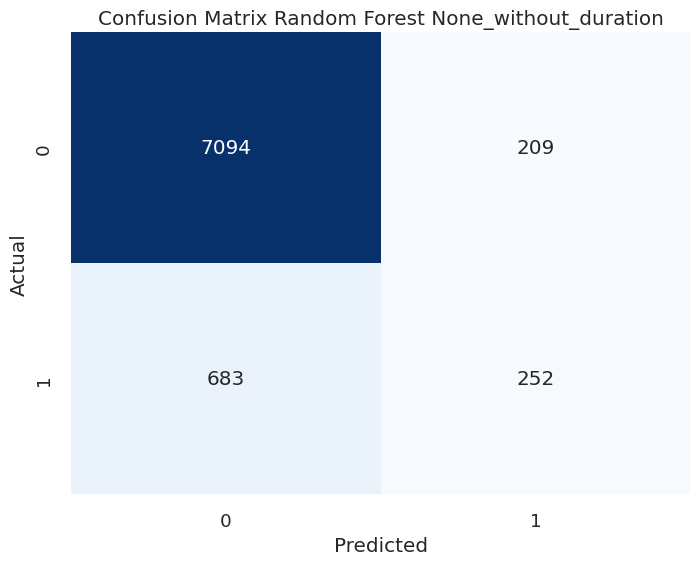

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [61]:
rf_model_scale_d = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_scale_d,X_train_transform_d,y_train,X_test_transform_d,y_test)
rf_model_notable = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None_without_duration"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

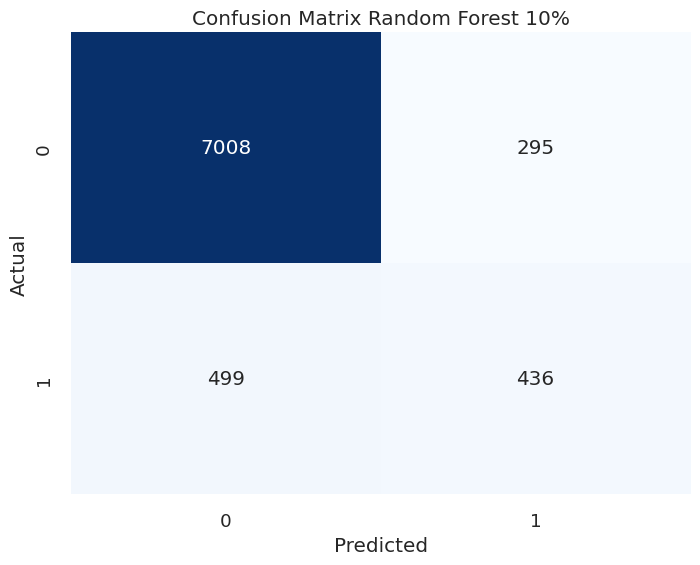

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [62]:
rf_model_0_scale = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_0_scale,X_train_transform_0,y_train,X_test_transform_0,y_test)
rf_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

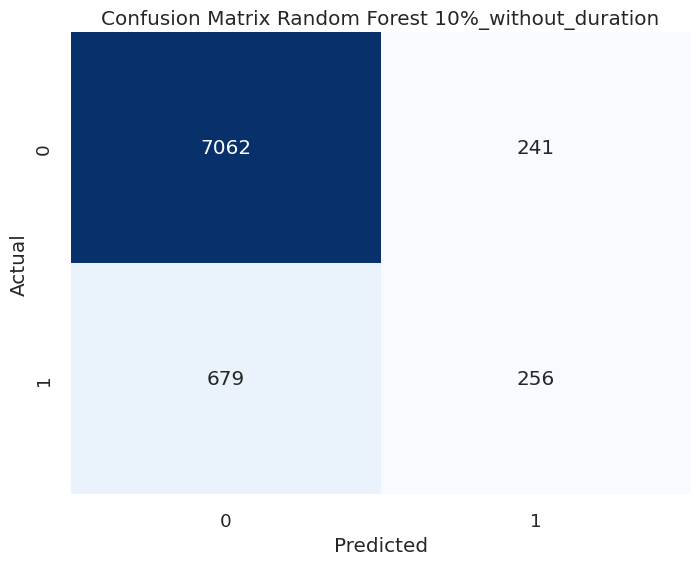

,Scaler,Feature Selection,Model,Accuracy,Precision,Recall,F1,Confusion Matrix,CV Accuracy,CV F1,CV F1 Weighted
0,None,None,Logistic Regression,0.911508,0.801942,0.700155,0.736914,"[[7110, 193], [536, 399]]",0.908892,0.718563,0.897955
0,None,None - Without Duration,Logistic Regression,0.897305,0.787612,0.587695,0.618638,"[[7217, 86], [760, 175]]",0.899090,0.633475,0.875315
0,None,10%,Logistic Regression,0.907987,0.792933,0.682316,0.720009,"[[7115, 188], [570, 365]]",0.907860,0.717512,0.897249
0,None,10%_without_duration,Logistic Regression,0.896455,0.768064,0.598873,0.631600,"[[7185, 118], [735, 200]]",0.898392,0.635609,0.875461
0,Standardscaler,None,Logistic Regression,0.910172,0.798658,0.693340,0.730565,"[[7112, 191], [549, 386]]",0.909590,0.726127,0.899872
0,Standardscaler,None_without_duration,Logistic Regression,0.895970,0.758232,0.608391,0.641897,"[[7160, 143], [714, 221]]",0.899666,0.647598,0.878612
0,Standardscaler,10%,Logistic Regression,0.908352,0.792654,0.686718,0.723624,"[[7109, 194], [561, 374]]",0.907587,0.717999,0.897222
0,Standardscaler,10%_without_duration,Logistic Regression,0.896213,0.768587,0.595472,0.627459,"[[7190, 113], [742, 193]]",0.898695,0.631510,0.874720
0,None,None,Random Forest,0.906652,0.776214,0.712338,0.738354,"[[7038, 265], [504, 431]]",0.910470,0.741592,0.903513
0,None,None_without_duration,Random Forest,0.890872,0.725370,0.618572,0.648429,"[[7090, 213], [686, 249]]",0.892322,0.653422,0.876454


In [63]:
rf_model_1_scale = RandomForestClassifier(n_estimators = 10, random_state = random_state)
temp = Models_Evaluation_Metrics(rf_model_1_scale,X_train_transform_1,y_train,X_test_transform_1,y_test)
rf_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "10%_without_duration"
scaler = "Standardscaler"
model_type = str(model)+" "+str(feature_selection)+" "+str(scaler)
cv_accuracy[model_type] = temp[1]
cv_fmacro[model_type] = temp[2]
cv_fweighted[model_type] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
temp_result.insert(0, 'Scaler', scaler)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

In [64]:
cv_accuracy

,Logistic Regression None None,Logistic Regression None - Without Duration None,Logistic Regression 10% None,Logistic Regression 10%_without_duration None,Logistic Regression None Standardscaler,Logistic Regression None_without_duration Standardscaler,Logistic Regression 10% Standardscaler,Logistic Regression 10%_without_duration Standardscaler,Random Forest None None,Random Forest None_without_duration None,Random Forest 10% None,Random Forest 10%_without_duration None,Random Forest None Standardscaler,Random Forest None_without_duration Standardscaler,Random Forest 10% Standardscaler,Random Forest 10%_without_duration Standardscaler
0,0.910167,0.901669,0.910774,0.901366,0.913505,0.902580,0.910774,0.900759,0.915630,0.899241,0.905311,0.897724,0.916540,0.898938,0.905311,0.897117
1,0.905918,0.900152,0.903490,0.896206,0.902276,0.899848,0.902276,0.896206,0.905918,0.884370,0.898634,0.887102,0.906222,0.884370,0.898027,0.887102
2,0.908042,0.900759,0.906829,0.898634,0.908953,0.901669,0.904401,0.898331,0.911381,0.891351,0.901366,0.895903,0.910167,0.891654,0.901366,0.895599
3,0.915630,0.898331,0.907739,0.898634,0.915023,0.898331,0.908346,0.898027,0.913505,0.893171,0.910774,0.895296,0.913202,0.893171,0.911077,0.894689
4,0.910470,0.900759,0.910167,0.898634,0.909560,0.901973,0.910167,0.898634,0.905008,0.896813,0.903794,0.888619,0.905615,0.895296,0.904704,0.888619
5,0.912291,0.901669,0.913809,0.904704,0.917451,0.903794,0.915023,0.904704,0.915326,0.894385,0.907436,0.894992,0.915023,0.894689,0.907739,0.894385
6,0.907739,0.898027,0.908346,0.897117,0.910167,0.896510,0.908649,0.898331,0.915326,0.894082,0.909560,0.894082,0.915326,0.893778,0.909560,0.893778
7,0.909863,0.895599,0.909560,0.892868,0.911684,0.895599,0.908042,0.894992,0.910470,0.894992,0.908042,0.894689,0.910167,0.894385,0.908953,0.894992
8,0.905008,0.898331,0.905918,0.897724,0.905008,0.901669,0.906829,0.898938,0.907436,0.891047,0.906525,0.888923,0.907739,0.890744,0.906525,0.888619
9,0.903794,0.895599,0.901973,0.898027,0.902276,0.894689,0.901366,0.898027,0.904704,0.883763,0.906222,0.889226,0.904704,0.883763,0.906525,0.888923


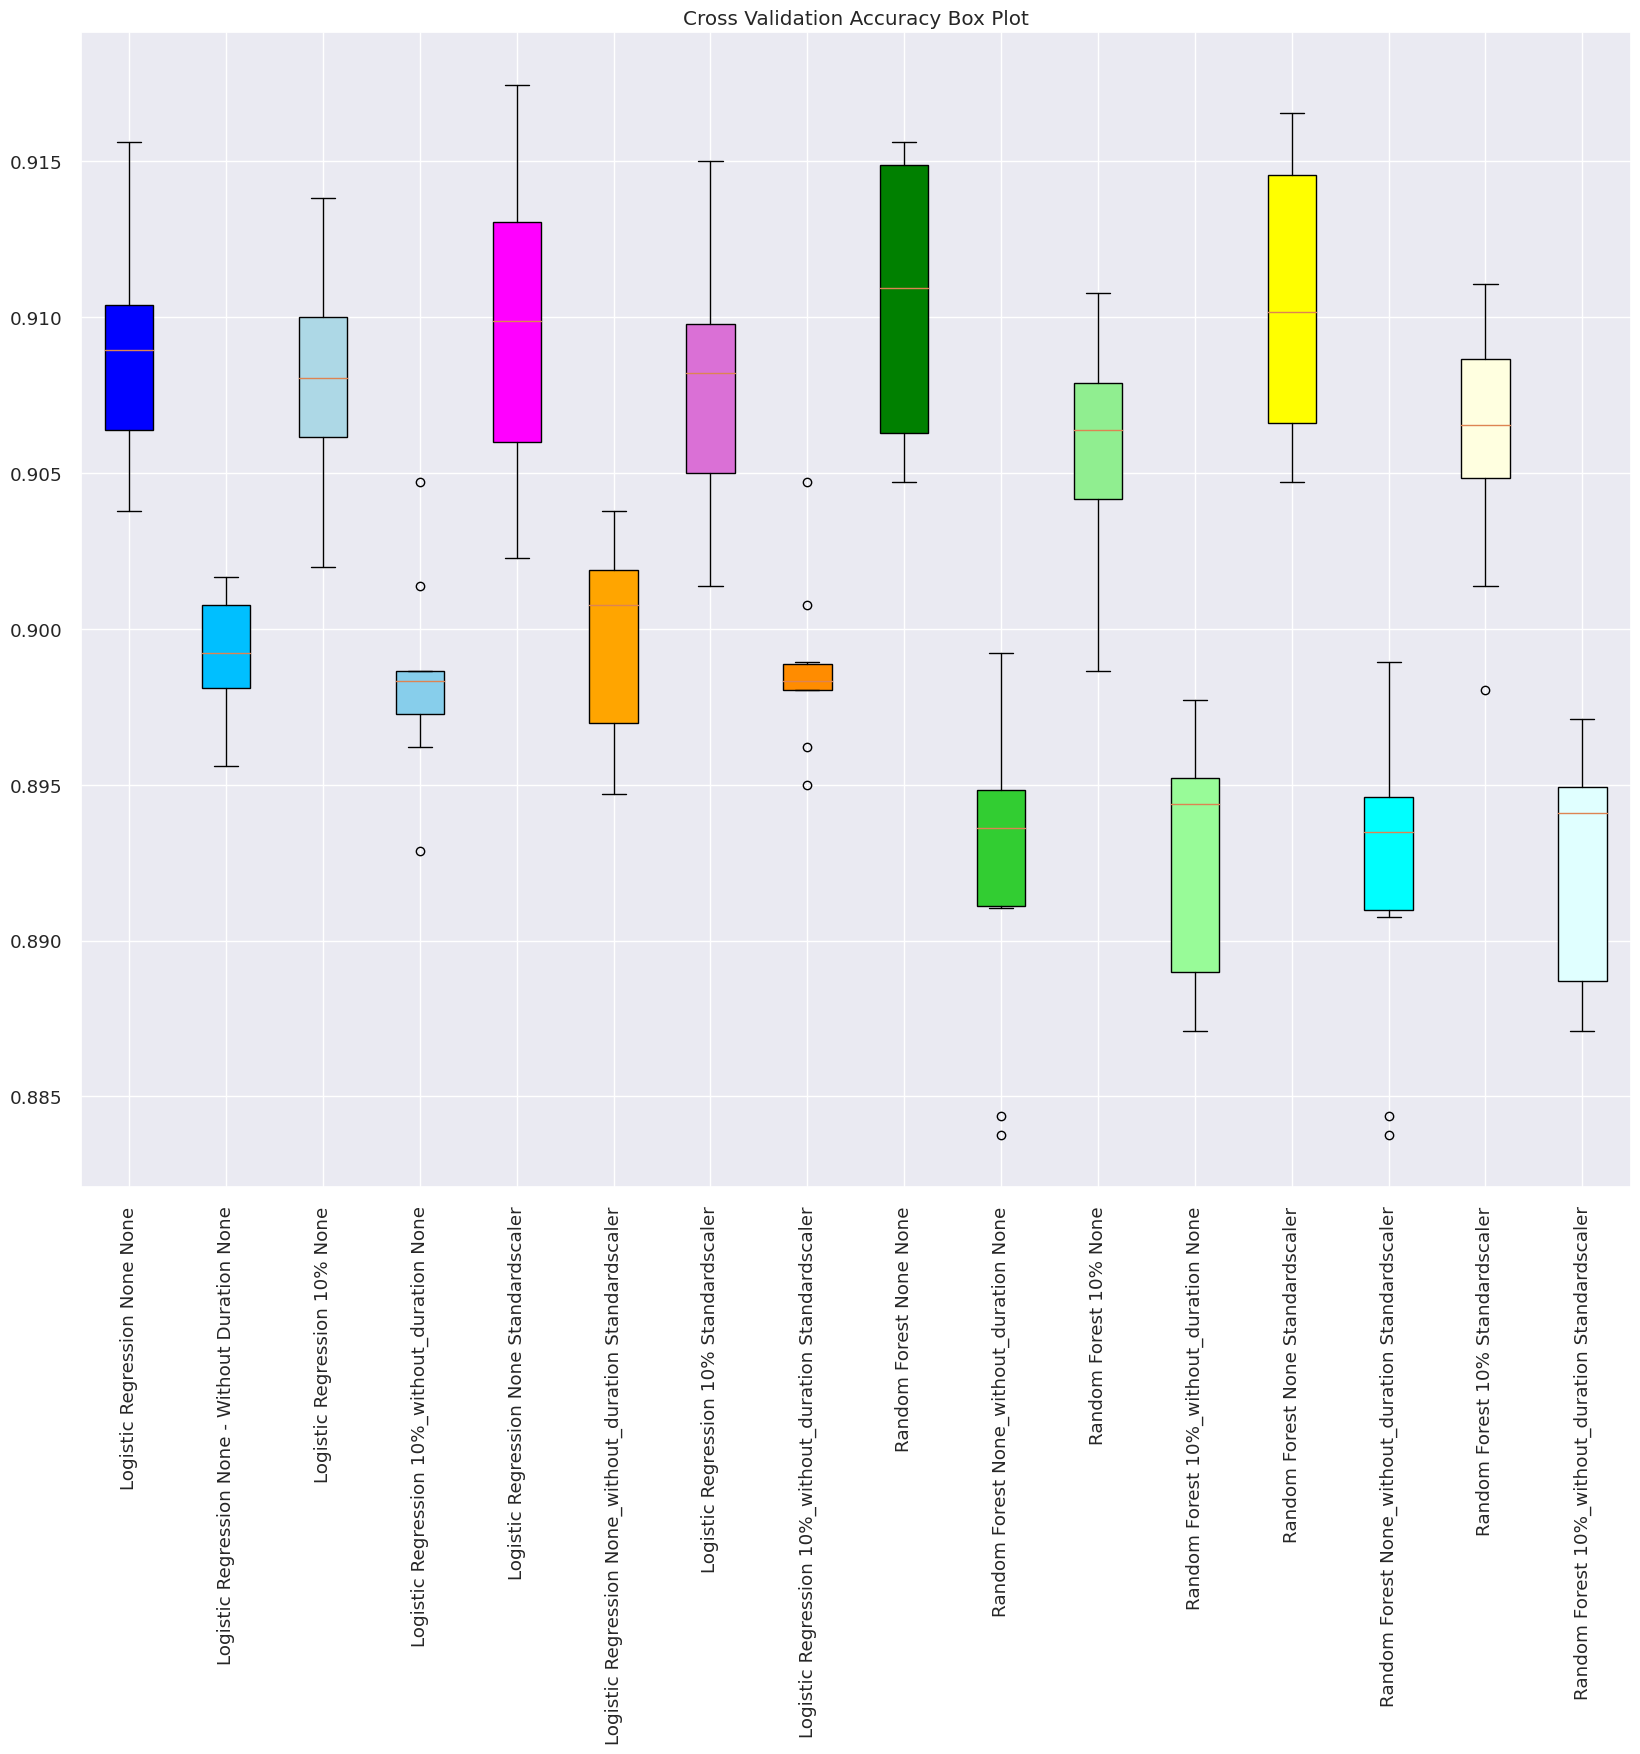

In [65]:
# rectangular box plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))
acc_plot = ax.boxplot(cv_accuracy,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=cv_accuracy.columns)  # will be used to label x-ticks
ax.set_title('Cross Validation Accuracy Box Plot')
plt.xticks(rotation=90)

# fill with colors
colors = ['blue', 'deepskyblue', 'lightblue', 'skyblue', 'magenta', 'orange', 'orchid', 'darkorange', 'green', 'limegreen', 'lightgreen', 'palegreen', 'yellow', 'Cyan', 'lightyellow', 'lightcyan']
for patch, color in zip(acc_plot['boxes'], colors):
  patch.set_facecolor(color)

plt.savefig('Cross Validation Accuracy Box Plot.png', bbox_inches='tight')
plt.show()

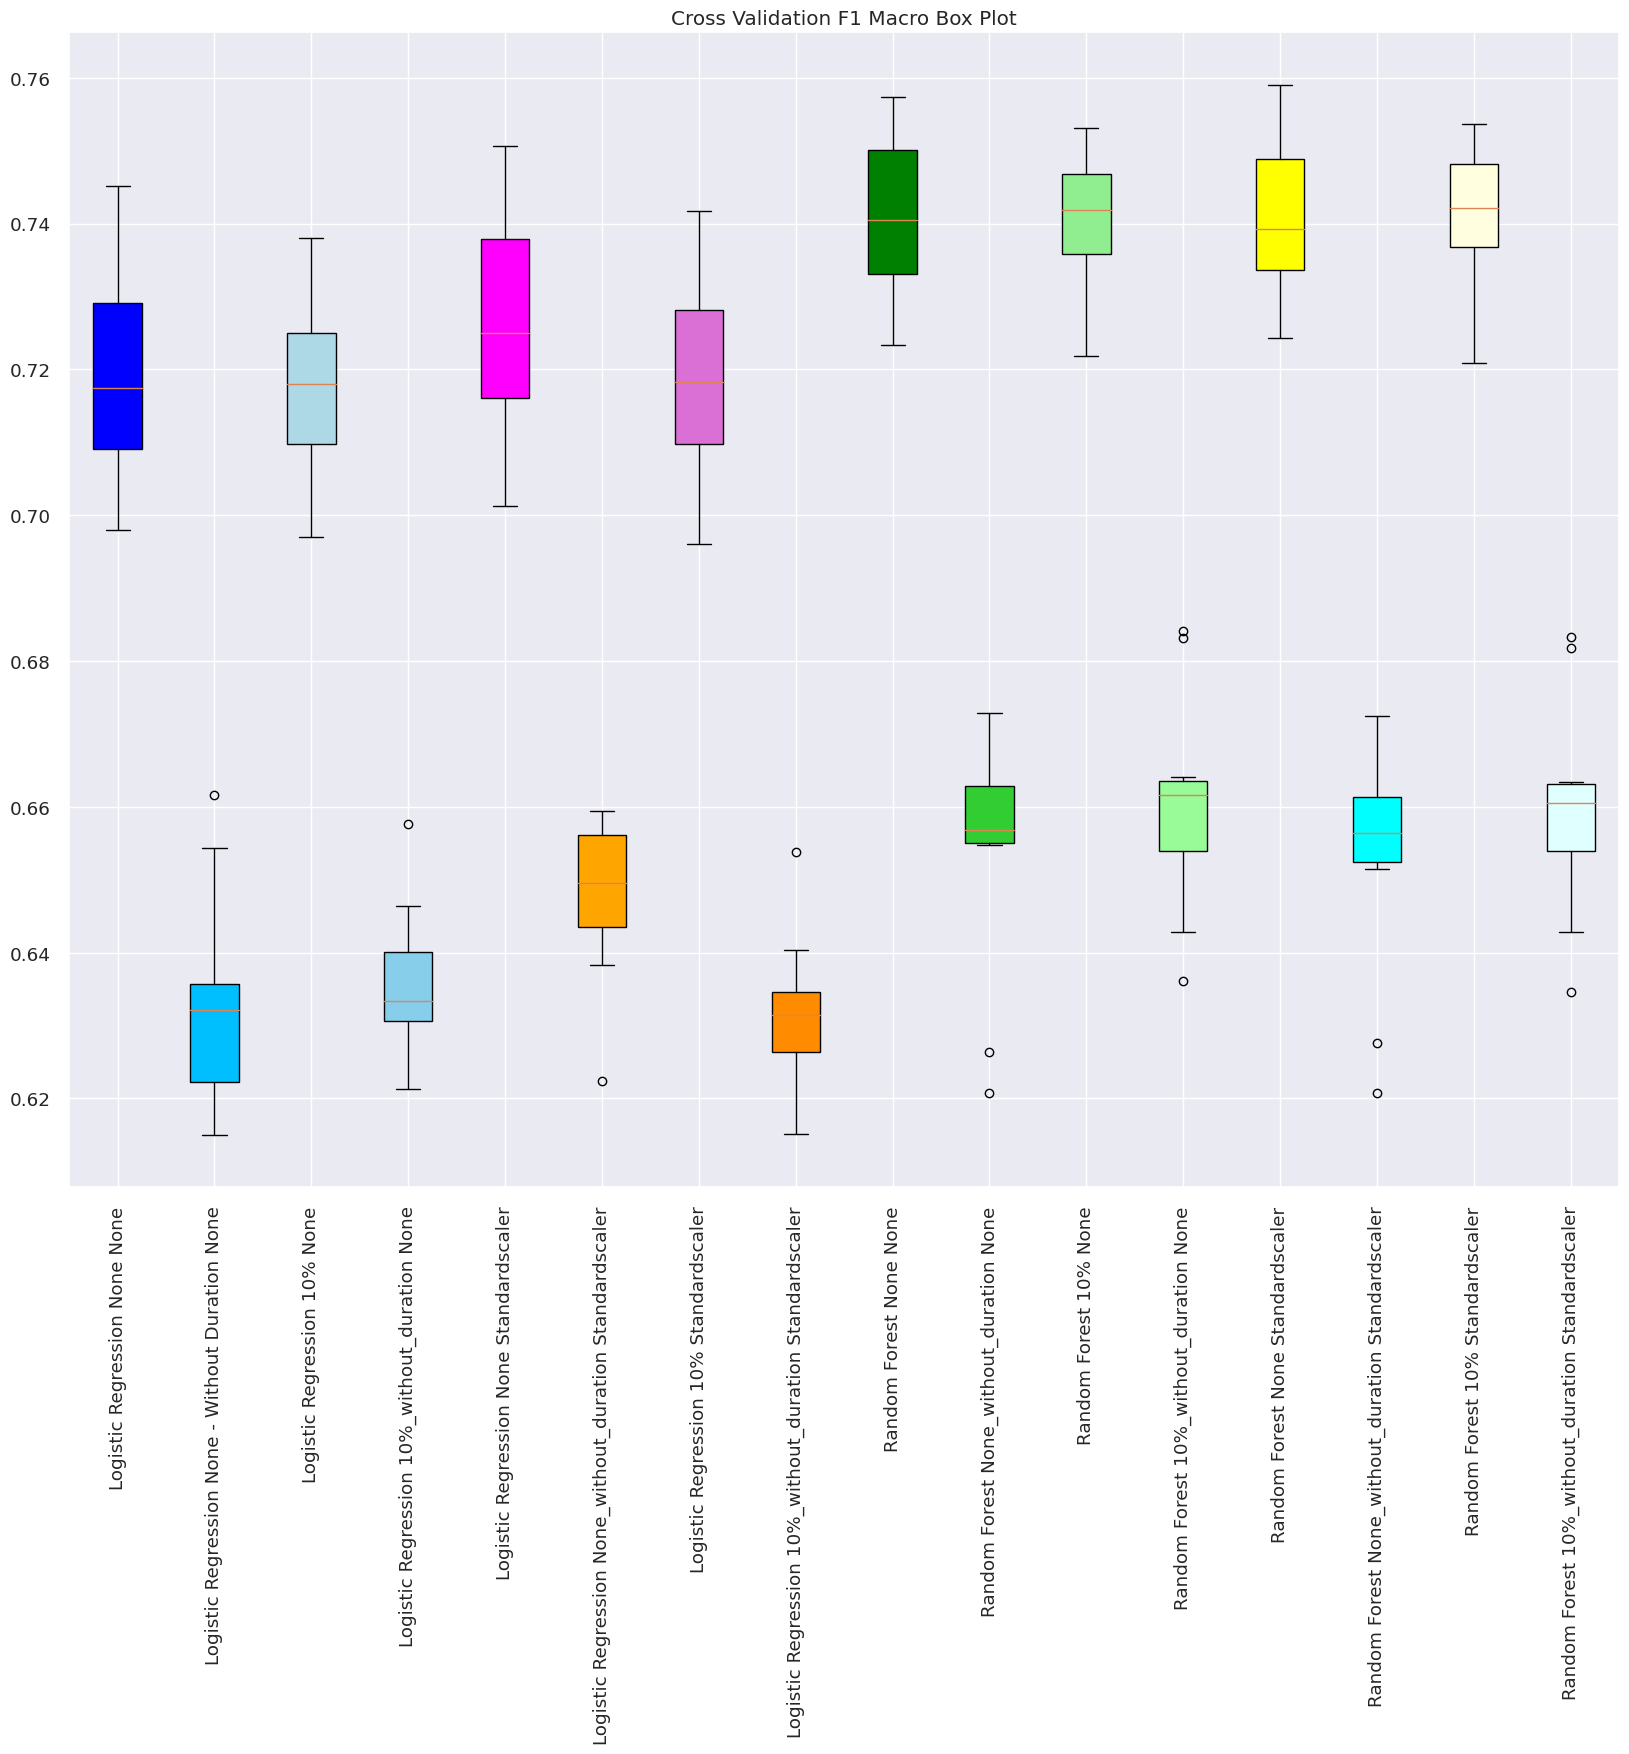

In [66]:
# rectangular box plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))

fmacro_plot = ax.boxplot(cv_fmacro,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=cv_fmacro.columns)  # will be used to label x-ticks
ax.set_title('Cross Validation F1 Macro Box Plot')
plt.xticks(rotation=90)

# fill with colors
colors = ['blue', 'deepskyblue', 'lightblue', 'skyblue', 'magenta', 'orange', 'orchid', 'darkorange', 'green', 'limegreen', 'lightgreen', 'palegreen', 'yellow', 'Cyan', 'lightyellow', 'lightcyan']
for patch, color in zip(fmacro_plot['boxes'], colors):
  patch.set_facecolor(color)
plt.savefig('Cross Validation F1 Box Plot.png', bbox_inches='tight')
plt.show()

In [67]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int64

### Comparing the two models

From Cross Validation (Training Point of View)
- The feature selection didn't perform well for both Logistic Regression and Random Forest, because the range of the results (indicated with Darker and or Brighter color) didn't really differ compared to the model without feature selection (indicated by Light Color).
- Furthermore Standardisation with standardscaler didn't change the model significantly, proven from the given chart of Cross Validation Accuracy comparison
- Eventually, the duration feature significantly change the model's Recall and F1 score, while didn't change significantly the accuracy, but with the plot we can easily see there is a difference compared to the other indicator such as feature selection and standardisation.

From Test Data
- According to the evaluation metrics chart, Random Forest with all features have the highest F1-Score which is around 73.8% (accuracy around 90.6%), but because we can't use the duration feature for a realistic predictive model, then Random Forest with Standardscaler give the best result with 65.1% F1 and 89.2% Accuracy score.
- On the other hand, Logistic Regression best model is trained with all features have the highest F1-Score which is around 73.7% (accuracy around 91.2%), but because we can't use the duration feature for a realistic predictive model, then Logistic Regression with Standardscaler give the best result with 64.2% F1 and 89.6% Accuracy score.
-Moreover from the Cross Validation Average Boxplot Comparison, It is evident that Random Forest has a higher score for F1 score and more predictive toward "Yes" label compared to Logistic Regression.

## Models Explaination

## Logistic Regression Model

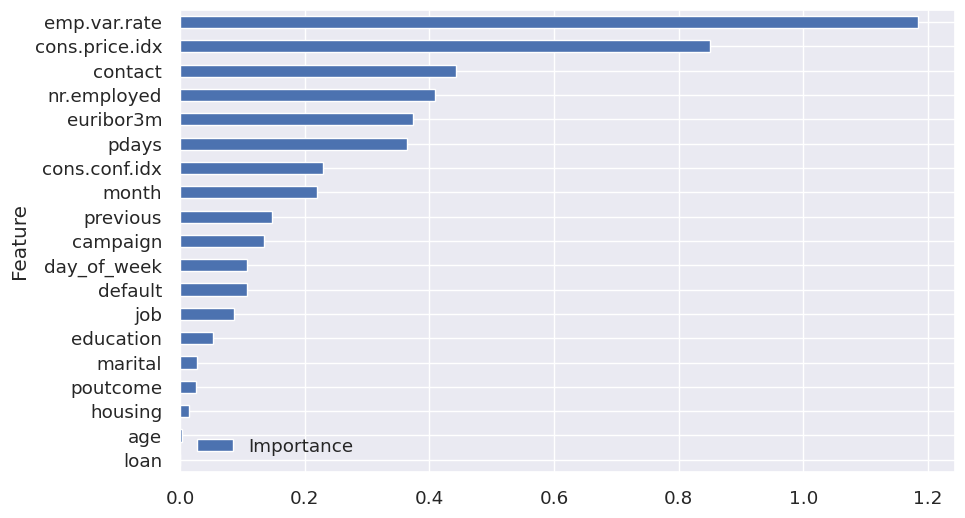

In [68]:
coefficients = Logistic_model_scale_d.coef_[0]

feature_importance_logistic_regression = pd.DataFrame({'Feature': all_feature_without_duration, 'Importance': np.abs(coefficients)})
feature_importance_logistic_regression = feature_importance_logistic_regression.sort_values('Importance', ascending=True)
feature_importance_logistic_regression.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)).legend(loc='best')

## Random Forest

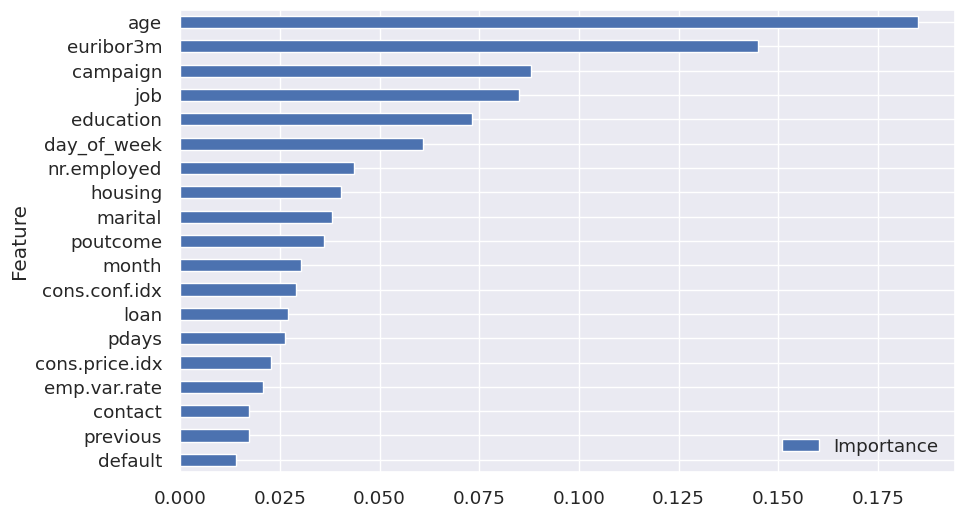

In [69]:
importances = rf_model_scale_d.feature_importances_

feature_importance_random_forest = pd.DataFrame({'Feature': all_feature_without_duration, 'Importance': np.abs(importances)})
feature_importance_random_forest = feature_importance_random_forest.sort_values('Importance', ascending=True)
feature_importance_random_forest.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)).legend(loc='best')

The selection of important features by each model, Logistic Regression and Random Forest, sheds light on the different aspects of the dataset that influence the prediction outcome.

In Logistic Regression, the employment variation rate and consumer price index emerge as significant features. The employment variation rate is a quarterly indicator reflecting changes in the employment market. It is a critical economic indicator that directly impacts consumer behavior and their likelihood to subscribe to a term deposit. Similarly, the consumer price index, a monthly indicator, provides insights into the overall inflationary pressures in the economy. Fluctuations in consumer prices can affect consumer confidence and purchasing power, thereby influencing their decision to subscribe to financial products such as term deposits. Hence, Logistic Regression prioritizes these economic indicators, recognizing their direct impact on consumer behavior and subscription outcomes.

Conversely, Random Forest identifies age and euribor 3-month rate as the most important features. Age, being a demographic variable, often captures life stage-related factors such as financial stability, investment goals, and risk tolerance. Younger individuals may have different financial priorities and risk perceptions compared to older age groups, affecting their propensity to subscribe to term deposits. On the other hand, the euribor 3-month rate, a daily indicator, represents the prevailing interest rates in the Eurozone. Fluctuations in interest rates can influence consumer savings and investment decisions, making it a crucial factor in predicting subscription outcomes. Therefore, Random Forest prioritizes demographic factors such as age alongside macroeconomic indicators like interest rates, recognizing their collective impact on subscription behavior.

In summary, the selection of employment variation rate and consumer price index by Logistic Regression emphasizes the significance of economic indicators, while the inclusion of age and euribor 3-month rate by Random Forest underscores the importance of demographic and macroeconomic factors in predicting subscription outcomes. These features encapsulate diverse aspects of consumer behavior and economic conditions, providing valuable insights into the drivers of subscription decisions in the banking sector.